# Data Cleaning, Exploration, and Analysis of TSLA Dataset

## 1. Data Cleaning and Understanding
The initial phase focuses on preparing the TSLA dataset by cleaning and verifying data quality, ensuring it’s ready for further analysis. Key steps include:
   - **Check Basic Statistics**: Summarize basic statistics of each feature (e.g., mean, median, and standard deviation) to understand the overall distribution and variability of TSLA stock data.
   - **Ensure Appropriate Data Types**: Confirm each column’s data type is appropriate, particularly ensuring that dates are in the correct format for time series analysis and other columns are numerical.
   - **Handle Missing Values**: Identify any missing values and handle them by filling, interpolating, or removing entries based on patterns and analysis needs.
   - **Normalization or Scaling**: Normalize or scale the data where needed, especially for models that require consistent feature scaling.

## 2. Exploratory Data Analysis (EDA)
Exploratory Data Analysis (EDA) allows us to discover patterns and trends in the TSLA dataset. Steps involved include:
   - **Trend Visualization**: Plot the closing price over time to identify general trends and potential cyclical patterns, revealing the stock’s long-term direction.
   - **Daily Percentage Change**: Calculate and visualize the daily percentage change to observe volatility and highlight significant price movements.
   - **Rolling Means and Standard Deviations**: Compute rolling means and standard deviations to capture short-term trends and fluctuations, helping to identify periods of high or low market activity.
   - **Outlier Detection**: Detect outliers through statistical analysis or visual inspection, providing insights into extreme stock price behavior.
   - **High/Low Return Analysis**: Analyze days with unusually high or low returns, helping to understand market responses during extreme fluctuations.

## 3. Seasonality and Trend Analysis
Seasonal and trend analysis will help to better understand TSLA stock price behavior over time:
   - **Decomposition of Time Series**: Using tools like `statsmodels`, we will break down the time series into trend, seasonal, and residual components, which allows us to uncover underlying seasonal cycles and general trends in TSLA stock prices.

## 4. Volatility Analysis
To better understand risk, we’ll evaluate the stock’s price variability and volatility through rolling calculations:
   - **Rolling Means and Standard Deviations**: Calculate and visualize rolling means and standard deviations to capture the degree of volatility and short-term trends in price movements. This will highlight periods of high market uncertainty and assess TSLA’s risk profile.

These tasks aim to provide a comprehensive understanding of TSLA’s stock price behavior, setting a strong foundation for predictive modeling and strategic insights into the high-volatility, high-return characteristics of this asset.


In [9]:
# Load the dataset
import pandas as pd
df_1 = pd.read_csv("../data/TSLA_historical_data.csv")
df_1.head()

,Unnamed: 0.1,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume
0,0,0,2015-01-02,14.858000,14.883333,14.217333,14.620667,14.620667,71466000
1,1,1,2015-01-05,14.303333,14.433333,13.810667,14.006000,14.006000,80527500
2,2,2,2015-01-06,14.004000,14.280000,13.614000,14.085333,14.085333,93928500
3,3,3,2015-01-07,14.223333,14.318667,13.985333,14.063333,14.063333,44526000
4,4,4,2015-01-08,14.187333,14.253333,14.000667,14.041333,14.041333,51637500


In [10]:
# Fixing the date column
# Convert 'Date' column to datetime format if it isn't already
df_1['Date'] = pd.to_datetime(df_1['Date'])

# Format the 'Date' column to remove the time and timezone information
df_1['Date'] = df_1['Date'].dt.strftime('%Y-%m-%d')

df_1.head()


,Unnamed: 0.1,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume
0,0,0,2015-01-02,14.858000,14.883333,14.217333,14.620667,14.620667,71466000
1,1,1,2015-01-05,14.303333,14.433333,13.810667,14.006000,14.006000,80527500
2,2,2,2015-01-06,14.004000,14.280000,13.614000,14.085333,14.085333,93928500
3,3,3,2015-01-07,14.223333,14.318667,13.985333,14.063333,14.063333,44526000
4,4,4,2015-01-08,14.187333,14.253333,14.000667,14.041333,14.041333,51637500


In [11]:
import pandas as pd

# Step 1: Basic statistics
print("Basic Statistics:\n")
print(df_1.describe())  # Provides statistics like mean, std, min, and quartiles

print("\nData Types:\n")
print(df_1.dtypes)

# Step 3: Check for missing values
print("\nMissing Values:\n")
print(df_1.isnull().sum())  # Shows number of missing values in each column

Basic Statistics:

       Unnamed: 0.1   Unnamed: 0         Open         High          Low  \
count   2474.000000  2474.000000  2474.000000  2474.000000  2474.000000   
mean    1236.500000  1236.500000   111.461872   113.895836   108.869421   
std      714.326606   714.326606   110.208156   112.643277   107.541830   
min        0.000000     0.000000     9.488000    10.331333     9.403333   
25%      618.250000   618.250000    17.058499    17.368167    16.790167   
50%     1236.500000  1236.500000    24.986667    25.279000    24.462334   
75%     1854.750000  1854.750000   217.264999   221.910004   212.084999   
max     2473.000000  2473.000000   411.470001   414.496674   405.666656   

             Close    Adj Close        Volume  
count  2474.000000  2474.000000  2.474000e+03  
mean    111.438965   111.438965  1.125745e+08  
std     110.120450   110.120450  7.449619e+07  
min       9.578000     9.578000  1.062000e+07  
25%      17.066167    17.066167  6.682590e+07  
50%      25.04300

In [12]:
df_1.to_csv("../data/TSLA_historical_data.csv")

Next, we are going to proceed to conducting the Exploratory Data Analysis(EDA) for the TSLA stock.

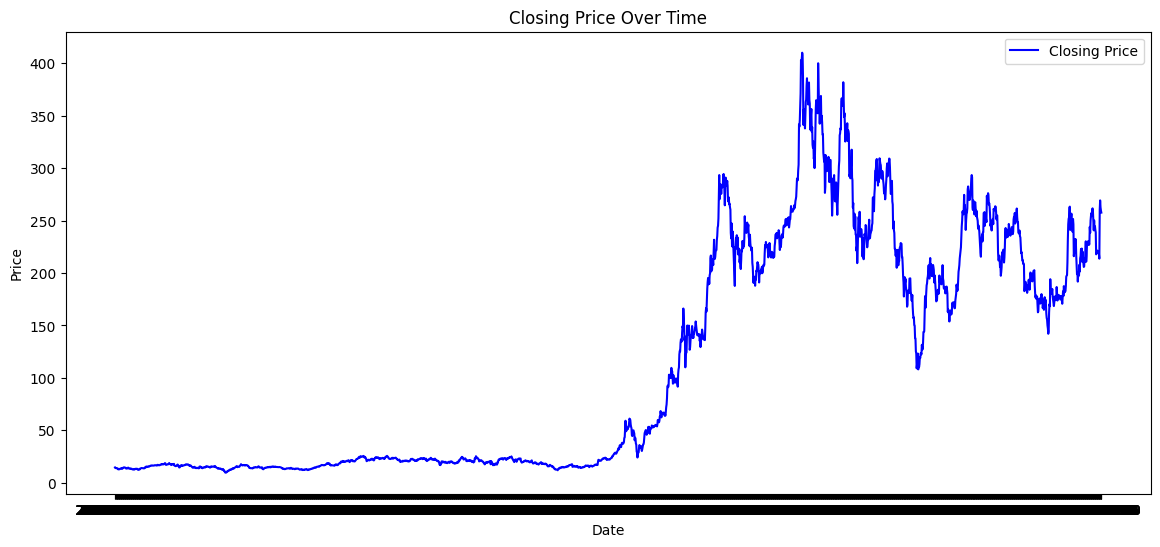

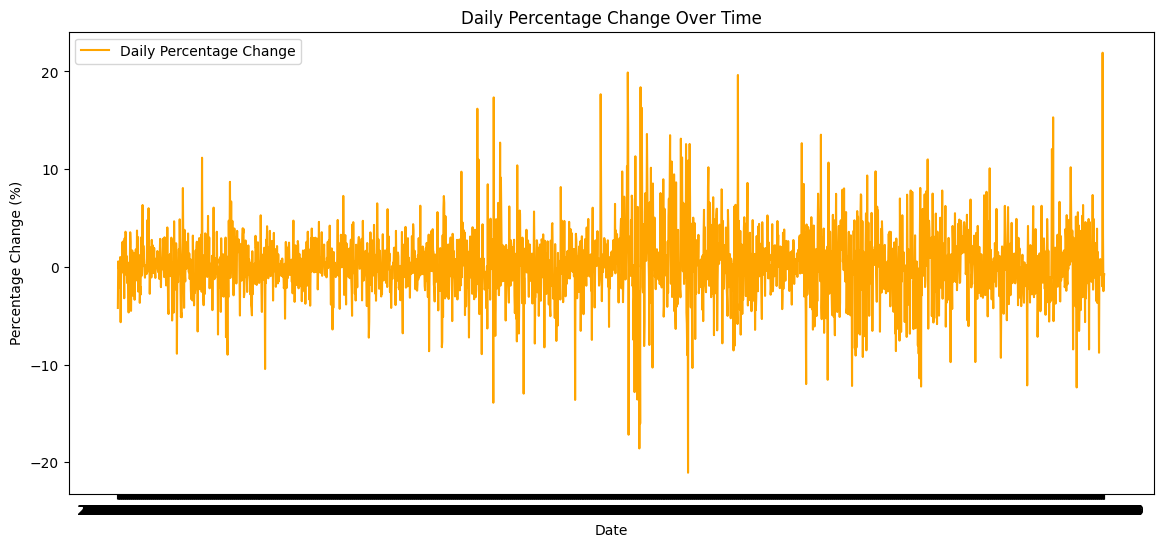

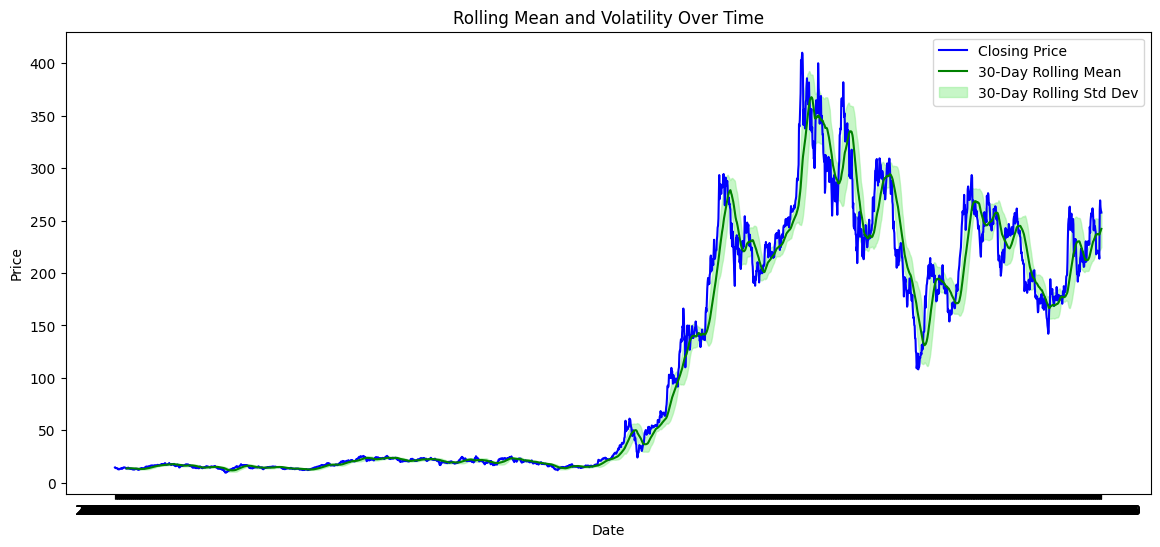

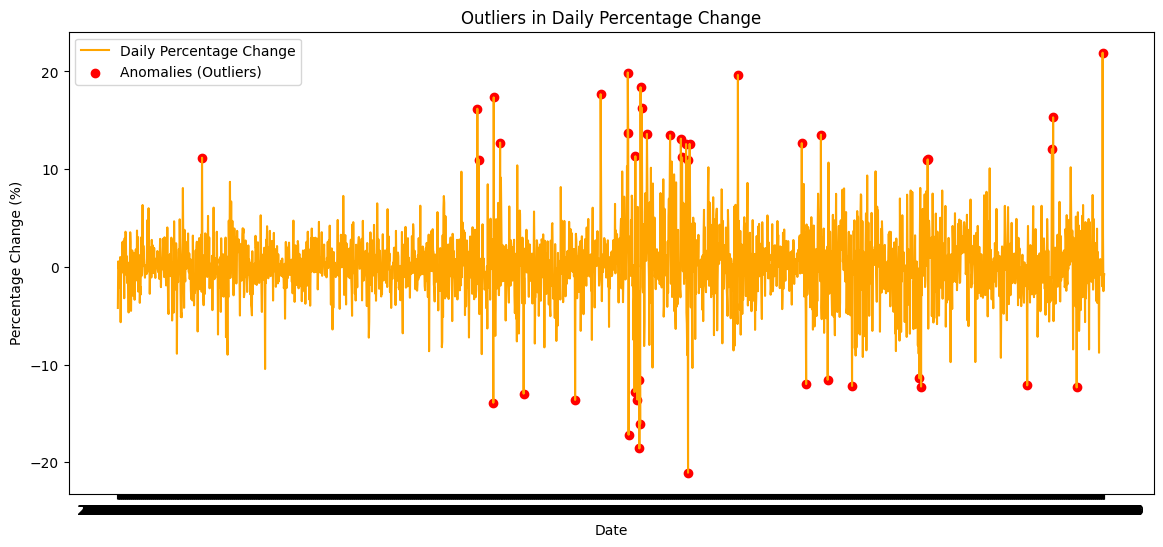

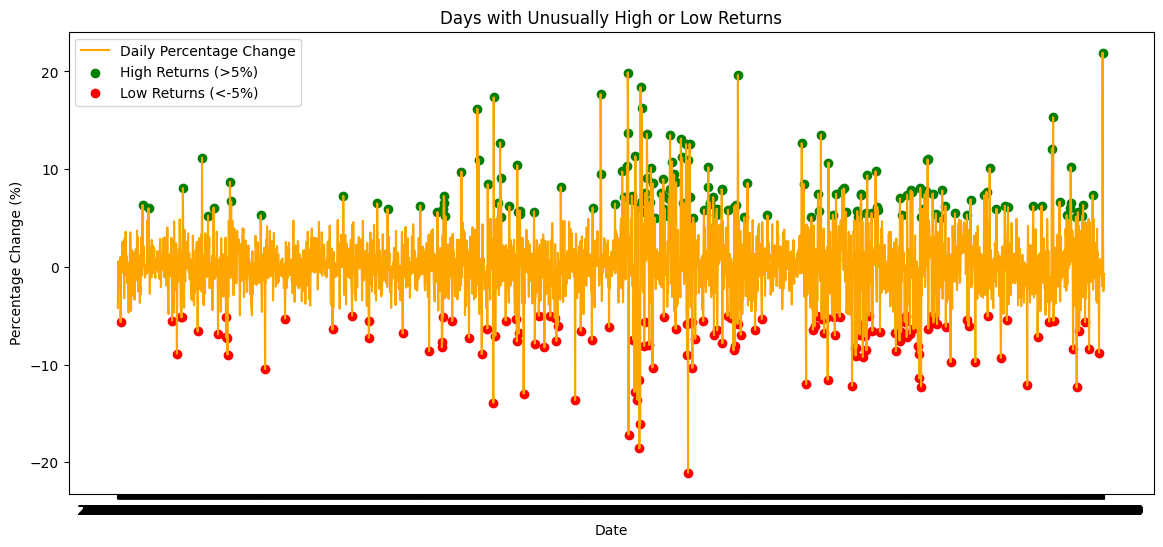

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df_1.set_index('Date', inplace=True)

# 1. Visualize the Closing Price over time
plt.figure(figsize=(14, 6))
plt.plot(df_1.index, df_1['Close'], color='blue', label='Closing Price')
plt.title('Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# 2. Calculate and plot the daily percentage change to observe volatility
df_1['Daily Change %'] = df_1['Close'].pct_change() * 100

plt.figure(figsize=(14, 6))
plt.plot(df_1.index, df_1['Daily Change %'], color='orange', label='Daily Percentage Change')
plt.title('Daily Percentage Change Over Time')
plt.xlabel('Date')
plt.ylabel('Percentage Change (%)')
plt.legend()
plt.show()

# 3. Analyze volatility with rolling mean and rolling standard deviation
# Calculate a 30-day rolling mean and standard deviation for 'Close'
df_1['Rolling Mean'] = df_1['Close'].rolling(window=30).mean()
df_1['Rolling Std'] = df_1['Close'].rolling(window=30).std()

plt.figure(figsize=(14, 6))
plt.plot(df_1.index, df_1['Close'], color='blue', label='Closing Price')
plt.plot(df_1.index, df_1['Rolling Mean'], color='green', label='30-Day Rolling Mean')
plt.fill_between(df_1.index, 
                 df_1['Rolling Mean'] - df_1['Rolling Std'], 
                 df_1['Rolling Mean'] + df_1['Rolling Std'], 
                 color='lightgreen', alpha=0.5, label='30-Day Rolling Std Dev')
plt.title('Rolling Mean and Volatility Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# 4. Outlier detection using Z-score on daily percentage changes
# Anomalies or outliers beyond 3 standard deviations
df_1['Z-score'] = (df_1['Daily Change %'] - df_1['Daily Change %'].mean()) / df_1['Daily Change %'].std()
outliers = df_1[np.abs(df_1['Z-score']) > 3]

plt.figure(figsize=(14, 6))
plt.plot(df_1.index, df_1['Daily Change %'], color='orange', label='Daily Percentage Change')
plt.scatter(outliers.index, outliers['Daily Change %'], color='red', label='Anomalies (Outliers)', marker='o')
plt.title('Outliers in Daily Percentage Change')
plt.xlabel('Date')
plt.ylabel('Percentage Change (%)')
plt.legend()
plt.show()

# 5. Analyze days with unusually high or low returns
# Highlight days with returns greater than 5% or lower than -5%
high_returns = df_1[df_1['Daily Change %'] > 5]
low_returns = df_1[df_1['Daily Change %'] < -5]

plt.figure(figsize=(14, 6))
plt.plot(df_1.index, df_1['Daily Change %'], color='orange', label='Daily Percentage Change')
plt.scatter(high_returns.index, high_returns['Daily Change %'], color='green', label='High Returns (>5%)', marker='o')
plt.scatter(low_returns.index, low_returns['Daily Change %'], color='red', label='Low Returns (<-5%)', marker='o')
plt.title('Days with Unusually High or Low Returns')
plt.xlabel('Date')
plt.ylabel('Percentage Change (%)')
plt.legend()
plt.show()

Next we proceed to showcasing Seasonality and Trends.

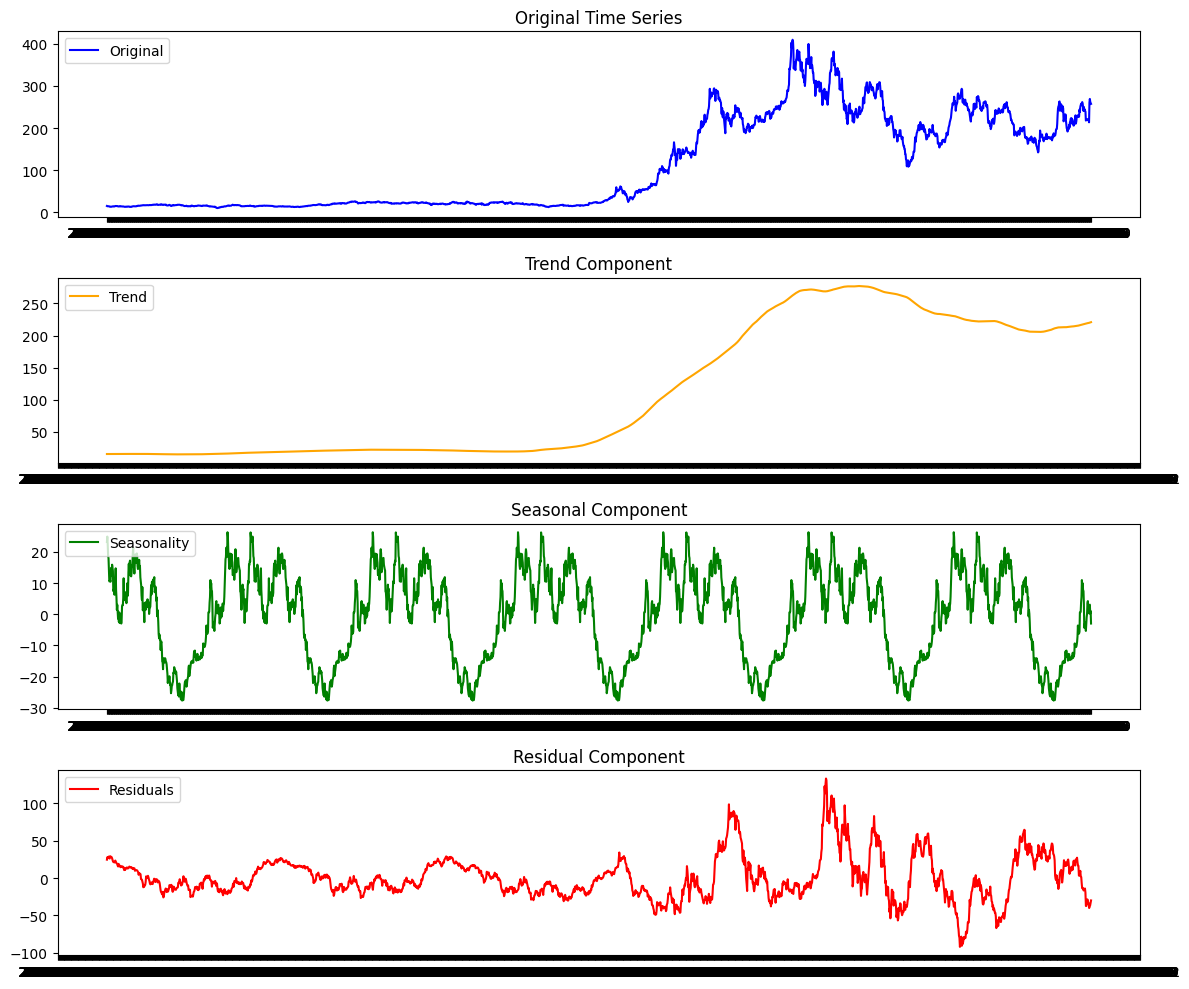

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Ensure the 'Date' column is the index and is in datetime format
df_1=pd.read_csv("../data/TSLA_historical_data.csv")
df_1.set_index('Date', inplace=True)

# Decompose the time series
# Assuming daily frequency data with an annual seasonality period of 365 days
result = seasonal_decompose(df_1['Close'], model='additive', period=365)

# Plot the decomposed components
plt.figure(figsize=(12, 10))
plt.subplot(4, 1, 1)
plt.plot(df_1['Close'], label='Original', color='blue')
plt.legend(loc='upper left')
plt.title('Original Time Series')

plt.subplot(4, 1, 2)
plt.plot(result.trend, label='Trend', color='orange')
plt.legend(loc='upper left')
plt.title('Trend Component')

plt.subplot(4, 1, 3)
plt.plot(result.seasonal, label='Seasonality', color='green')
plt.legend(loc='upper left')
plt.title('Seasonal Component')

plt.subplot(4, 1, 4)
plt.plot(result.resid, label='Residuals', color='red')
plt.legend(loc='upper left')
plt.title('Residual Component')

plt.tight_layout()
plt.show()

Next we proceed to analyzing volatility.

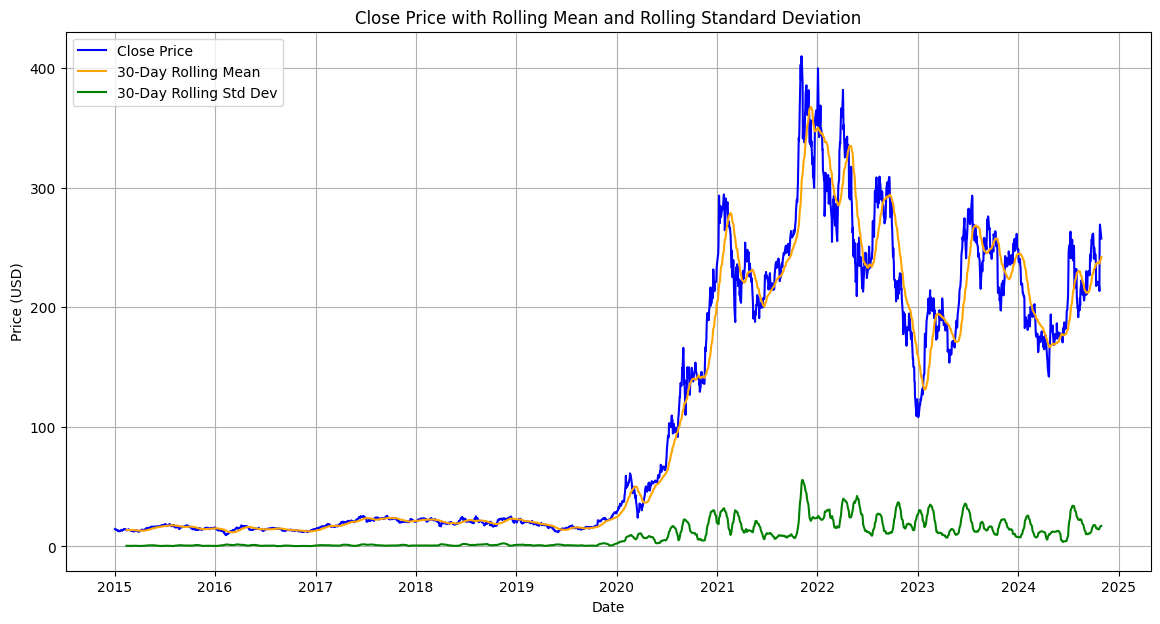

In [15]:

# Load the dataset
df_1 = pd.read_csv("../data/TSLA_historical_data.csv")
import pandas as pd
import matplotlib.pyplot as plt

# Ensure the 'Date' column is in datetime format
df_1['Date'] = pd.to_datetime(df_1['Date'])
df_1.set_index('Date', inplace=True)

# Set the window size (e.g., 30 days) for calculating the rolling mean and standard deviation
window_size = 30

# Calculate the rolling mean and rolling standard deviation
df_1['Rolling_Mean'] = df_1['Close'].rolling(window=window_size).mean()
df_1['Rolling_Std'] = df_1['Close'].rolling(window=window_size).std()

# Plotting the rolling mean and rolling standard deviation to visualize volatility
plt.figure(figsize=(14, 7))

# Plot the original closing price
plt.plot(df_1['Close'], color='blue', label='Close Price')

# Plot the rolling mean
plt.plot(df_1['Rolling_Mean'], color='orange', label=f'{window_size}-Day Rolling Mean')

# Plot the rolling standard deviation
plt.plot(df_1['Rolling_Std'], color='green', label=f'{window_size}-Day Rolling Std Dev')

plt.title('Close Price with Rolling Mean and Rolling Standard Deviation')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()
